# video-game-sale

Use the "Run" button to execute the code.

In [1]:
import pandas as pd

In [2]:
VG_sales_df = pd.read_csv('vgsales.csv')

In [3]:
VG_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
VG_sales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
VG_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
VG_sales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
VG_sales_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
VG_sales_df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
CCP                                1
Ascaron Entertainment              1
Milestone                          1
Warashi                            1
Quest                              1
Name: Publisher, Length: 578, dtype: int64

In [9]:
VG_sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
VG_sales_df['Year'].fillna('Not Available', inplace = True)
VG_sales_df['Publisher'].fillna('Not Available', inplace = True)

In [11]:
VG_sales_df.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [12]:
VideoGames_Year = VG_sales_df['Year'].value_counts().to_frame().reset_index().rename(columns = {'index':'Year','Year':'Count'})
VideoGames_Year = VideoGames_Year.drop([20]).sort_values(by = ['Year'])
VideoGames_Year

,Year,Count
37,1980,9
25,1981,46
28,1982,36
30,1983,17
36,1984,14
35,1985,14
29,1986,21
32,1987,16
34,1988,15
31,1989,17


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

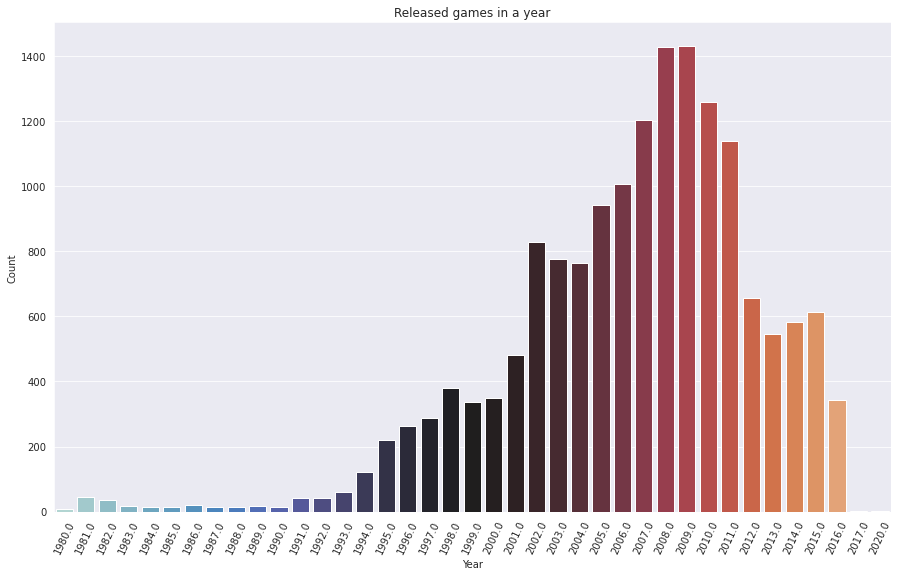

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,9))
plt.xticks(rotation = 65)
plt.title('Released games in a year')
plt.xlabel('Year')
plt.ylabel('Number of games released')
sns.barplot(x = VideoGames_Year.Year, y = VideoGames_Year.Count, palette = 'icefire');

In [15]:
VG_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
VG_sales_df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [17]:
VG_genre = VG_sales_df.groupby('Genre')[['Name']].count()
VG_genre

,Name
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


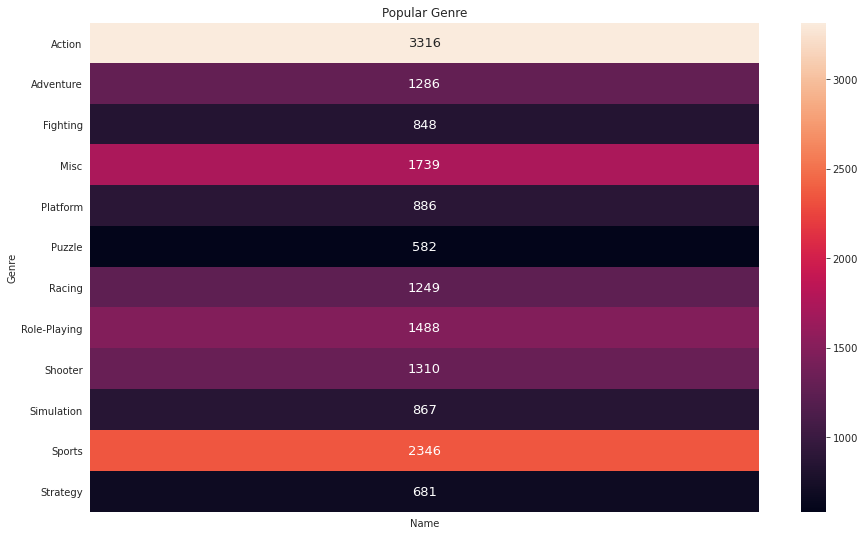

In [18]:
plt.figure(figsize=(15,9))
plt.title('Popular Genre')
#plt.xlabel('Genre')
#plt.ylabel('Number of games')
sns.heatmap(VG_genre, fmt="d", annot=True, annot_kws={"fontsize":13});

In [19]:
VG_platform = VG_sales_df.groupby('Platform')[['Name']].count()
VG_platform = VG_platform.reset_index().rename(columns = {'index':'Platform','Name':'Number of games'})
VG_platform

,Platform,Number of games
0,2600,133
1,3DO,3
2,3DS,509
3,DC,52
4,DS,2163
5,GB,98
6,GBA,822
7,GC,556
8,GEN,27
9,GG,1


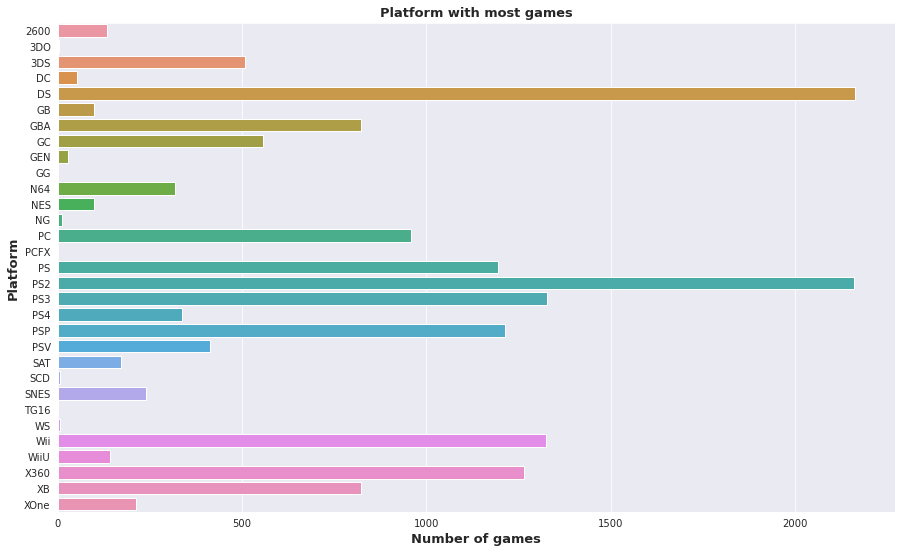

In [20]:
plt.figure(figsize=(15,9))
plt.title('Platform with most games', fontdict= { 'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Number of games', fontsize = 13, fontweight = 'bold')
plt.ylabel('Platform', fontsize = 13, fontweight = 'bold')
sns.barplot(data = VG_platform, x = 'Number of games', y = 'Platform');

In [21]:
VG_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
VG_publisher = VG_sales_df.groupby('Publisher')[['Name']].count()
VG_publisher = VG_publisher.reset_index().rename(columns = {'index':'Publisher','Name':'Number of games(by publisher)'})
VG_publisher.sort_values(by='Number of games(by publisher)', ascending = False)

,Publisher,Number of games(by publisher)
138,Electronic Arts,1351
21,Activision,975
347,Namco Bandai Games,932
526,Ubisoft,921
275,Konami Digital Entertainment,832
...,...,...
405,Playmore,1
406,Plenty,1
407,Pony Canyon,1
185,GameTek,1


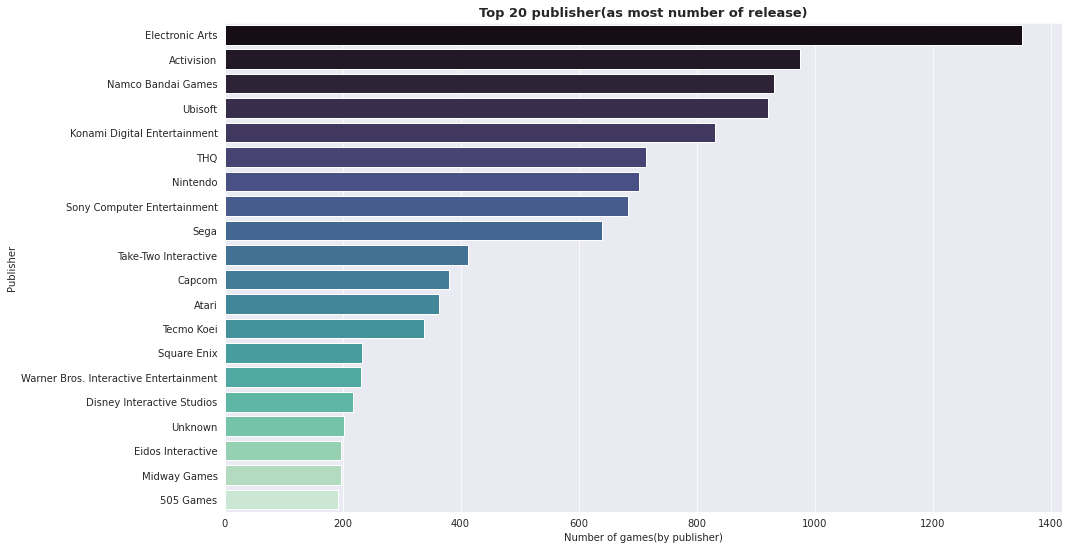

In [23]:
plt.figure(figsize=(15,9))
plt.title('Top 20 publisher(as most number of release)', fontsize = 13, fontweight = 'bold')
sns.barplot(data = VG_publisher.sort_values(by='Number of games(by publisher)',ascending = False).head(20), x = 'Number of games(by publisher)', y = 'Publisher', palette = 'mako');

In [24]:
VG_sales_df['Year'].replace('Not Available', 2009, inplace = True)

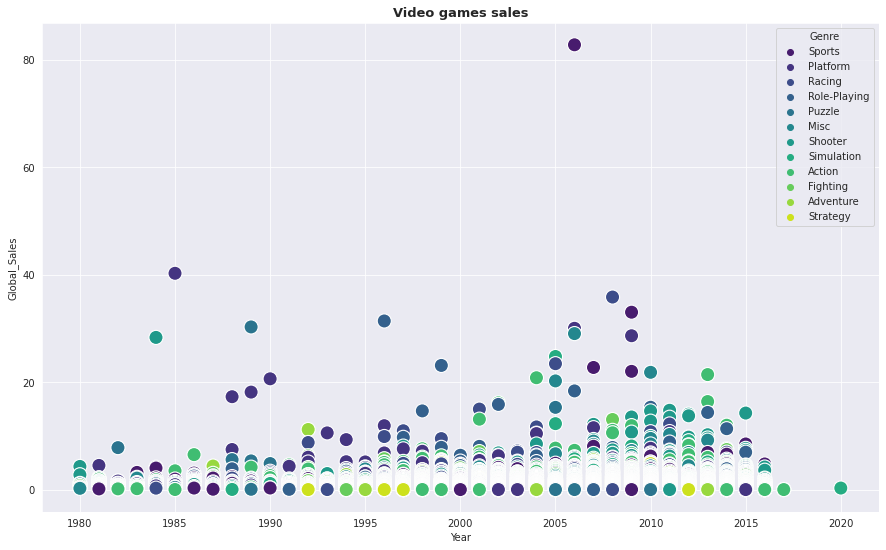

In [25]:
plt.figure(figsize = (15,9))
plt.title('Video games sales', fontsize = 13, fontweight = 'bold')
sns.scatterplot(x = VG_sales_df.Year,
                y = VG_sales_df.Global_Sales,
                hue = VG_sales_df.Genre,
                palette = 'viridis',
                s = 200);

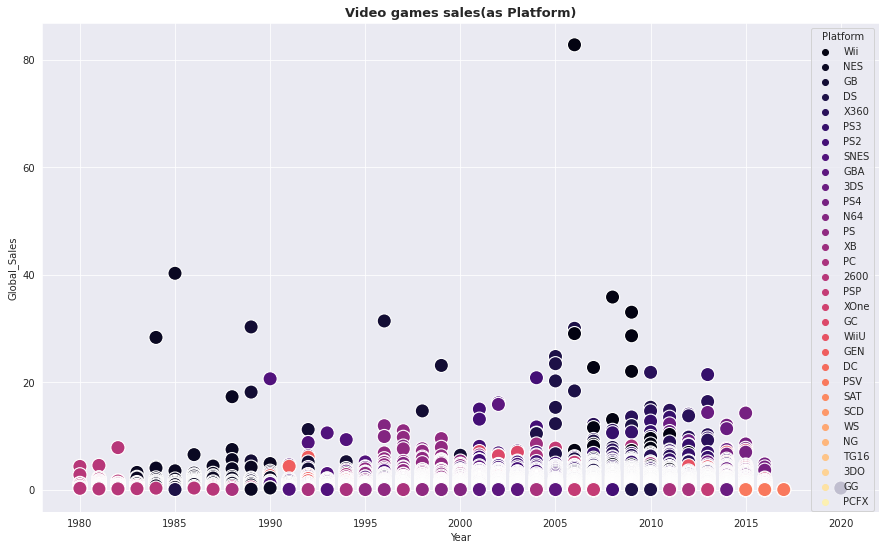

In [26]:
plt.figure(figsize = (15,9))
plt.title('Video games sales(as Platform)', fontsize = 13, fontweight = 'bold')
sns.scatterplot(x = VG_sales_df.Year,
                y = VG_sales_df.Global_Sales,
                hue = VG_sales_df.Platform,
                palette = 'magma',
                s = 200);